# Case Study 3 - Derive the share each premium donor has to pay and plot results

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
OUTPUT_DIR = Path("C:/Users/Kai/OneDrive - UT Cloud/Documents/Studium_ETH/Thesis")
EU = ['AUT', 'BEL', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'PRT', 
      'SVK', 'SVN', 'ESP', 'SWE']

In [3]:
finance_scheme = pd.read_excel(OUTPUT_DIR.joinpath("fs_high_inc.xlsx"))

In [6]:
def plot_prem_share(finance_scheme, weighter=1, eu=True, threshold_other = 1):    
    finance_scheme = finance_scheme[finance_scheme['Carbon Footprint per Capita (absolute)'] >= 6.5].copy()
    finance_scheme['Relative Carbon Footprint'] = (finance_scheme['Carbon Footprint per Capita (absolute)'] / finance_scheme['Carbon Footprint per Capita (absolute)'].median())**weighter
    finance_scheme['GDP share'] = finance_scheme['GDP (absolute)'] / finance_scheme['GDP (absolute)'].sum() * 100
    finance_scheme['Pay formula'] = finance_scheme['Relative Carbon Footprint'] * finance_scheme['GDP share']
    finance_scheme['Share of Pay'] = finance_scheme['Pay formula'] / finance_scheme['Pay formula'].sum() * 100
    
    if eu:
        eu_share = finance_scheme[finance_scheme['Code'].isin(EU)]['Share of Pay'].sum()
        eu_gdp_share = finance_scheme[finance_scheme['Code'].isin(EU)]['GDP share'].sum()
        eu_row = pd.DataFrame({'Code': ['EU'],'GDP share': [eu_gdp_share] ,'Share of Pay': [eu_share]})
        finance_scheme_no_eu = finance_scheme[~finance_scheme['Code'].isin(EU)]
        finance_scheme = pd.concat([finance_scheme_no_eu, eu_row], ignore_index=True)
    
    
    filtered_data = finance_scheme[finance_scheme['Share of Pay'] >= threshold_other]
    filtered_data = filtered_data.sort_values(by='Share of Pay', ascending=False, inplace=False)
    rest_value = finance_scheme[finance_scheme['Share of Pay'] < threshold_other]['Share of Pay'].sum()
    new_row = {'Code': 'Other', 'Share of Pay': rest_value}
    
    if rest_value > 0:
        filtered_data = pd.concat([filtered_data, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    
    unique_codes = finance_scheme['Code'].unique().tolist() + ['Other'] 
    color_palette = sns.color_palette("tab20", len(unique_codes))
    color_map = {code: color for code, color in zip(unique_codes, color_palette)}
    filtered_data['Color'] = filtered_data['Code'].map(color_map)

    plt.figure(figsize=(8, 8))
    plt.pie(
        filtered_data['Share of Pay'],
        colors=filtered_data['Color'],
        labels=filtered_data['Code'],
        autopct='%1.1f%%',
        textprops={'rotation_mode': 'anchor', 'va': 'center', 'rotation': -0}  
    )
    plt.legend(loc="upper right", ncol=2)
    plt.show()

    return_df = pd.DataFrame({"Country": finance_scheme['Code'], "Share": finance_scheme['Share of Pay']/100, "GDP": finance_scheme['GDP (absolute)']})

    return return_df

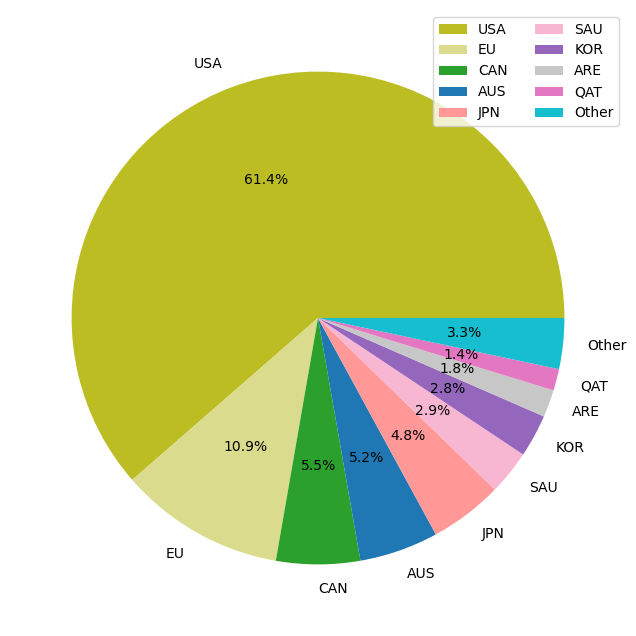

In [7]:
fs_w_1 = plot_prem_share(finance_scheme, weighter=1, eu=True)